In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

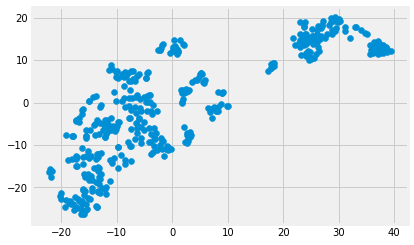

In [8]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])
plt.show()

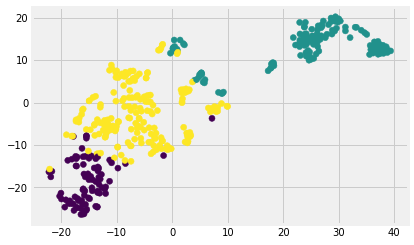

In [9]:
kmeans = KMeans(n_clusters=3,max_iter=100,random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=labels_train)
plt.show()

In [15]:
print('Кластер 0:\t{}'.format(X_train.loc[labels_train==0,'CRIM'].mean()))
print('Кластер 1:\t{}'.format(X_train.loc[labels_train==1,'CRIM'].mean()))
print('Кластер 2:\t{}'.format(X_train.loc[labels_train==2,'CRIM'].mean()))

Кластер 0:	0.07356558139534886
Кластер 1:	10.797028425196853
Кластер 2:	0.42166020942408367


In [16]:
print('Вся выборка:\t{}'.format(y_train.mean()))
print('Кластер 0:\t{}'.format(y_train[labels_train==0].mean()))
print('Кластер 1:\t{}'.format(y_train[labels_train==1].mean()))
print('Кластер 2:\t{}'.format(y_train[labels_train==2].mean()))

Вся выборка:	22.796534653465343
Кластер 0:	27.78837209302326
Кластер 1:	16.165354330708663
Кластер 2:	24.958115183246072


In [17]:
labels_test = kmeans.predict(X_test_scaled)

In [18]:
print('Вся выборка:\t{}'.format(y_test.mean()))
print('Кластер 0:\t{}'.format(y_test[labels_test==0].mean()))
print('Кластер 1:\t{}'.format(y_test[labels_test==1].mean()))
print('Кластер 2:\t{}'.format(y_test[labels_test==2].mean()))

Вся выборка:	21.488235294117644
Кластер 0:	31.35
Кластер 1:	16.43714285714286
Кластер 2:	21.860784313725492


In [19]:
print('Кластер 0:\t{}'.format(X_test.loc[labels_test==0,'CRIM'].mean()))
print('Кластер 1:\t{}'.format(X_test.loc[labels_test==1,'CRIM'].mean()))
print('Кластер 2:\t{}'.format(X_test.loc[labels_test==2,'CRIM'].mean()))

Кластер 0:	0.062060000000000004
Кластер 1:	10.165531142857143
Кластер 2:	0.26607882352941176
